In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [142]:

data_stroke  = pd.read_csv('healthcare-dataset-stroke-data.csv')

data_stroke.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [143]:
# Dropping the ID Column as it does not provide any useful information
data_stroke.drop(columns='id', inplace=True)

In [144]:
# Geting an overview of the datasets and its features
data_stroke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [145]:
data_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [146]:
# Below we got the maximum values for each Numerical feature

data_stroke.describe().loc['max']


age                   82.00
hypertension           1.00
heart_disease          1.00
avg_glucose_level    271.74
bmi                   97.60
stroke                 1.00
Name: max, dtype: float64

In [147]:
# Checking if there areany missing values

data_stroke.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [148]:
#Let's get No of Rows and Features we have in the dataset

print("No of Rows in the dataset: ",data_stroke.shape[0])
print("No of Features in the dataset: ",data_stroke.shape[1])

No of Rows in the dataset:  5110
No of Features in the dataset:  11


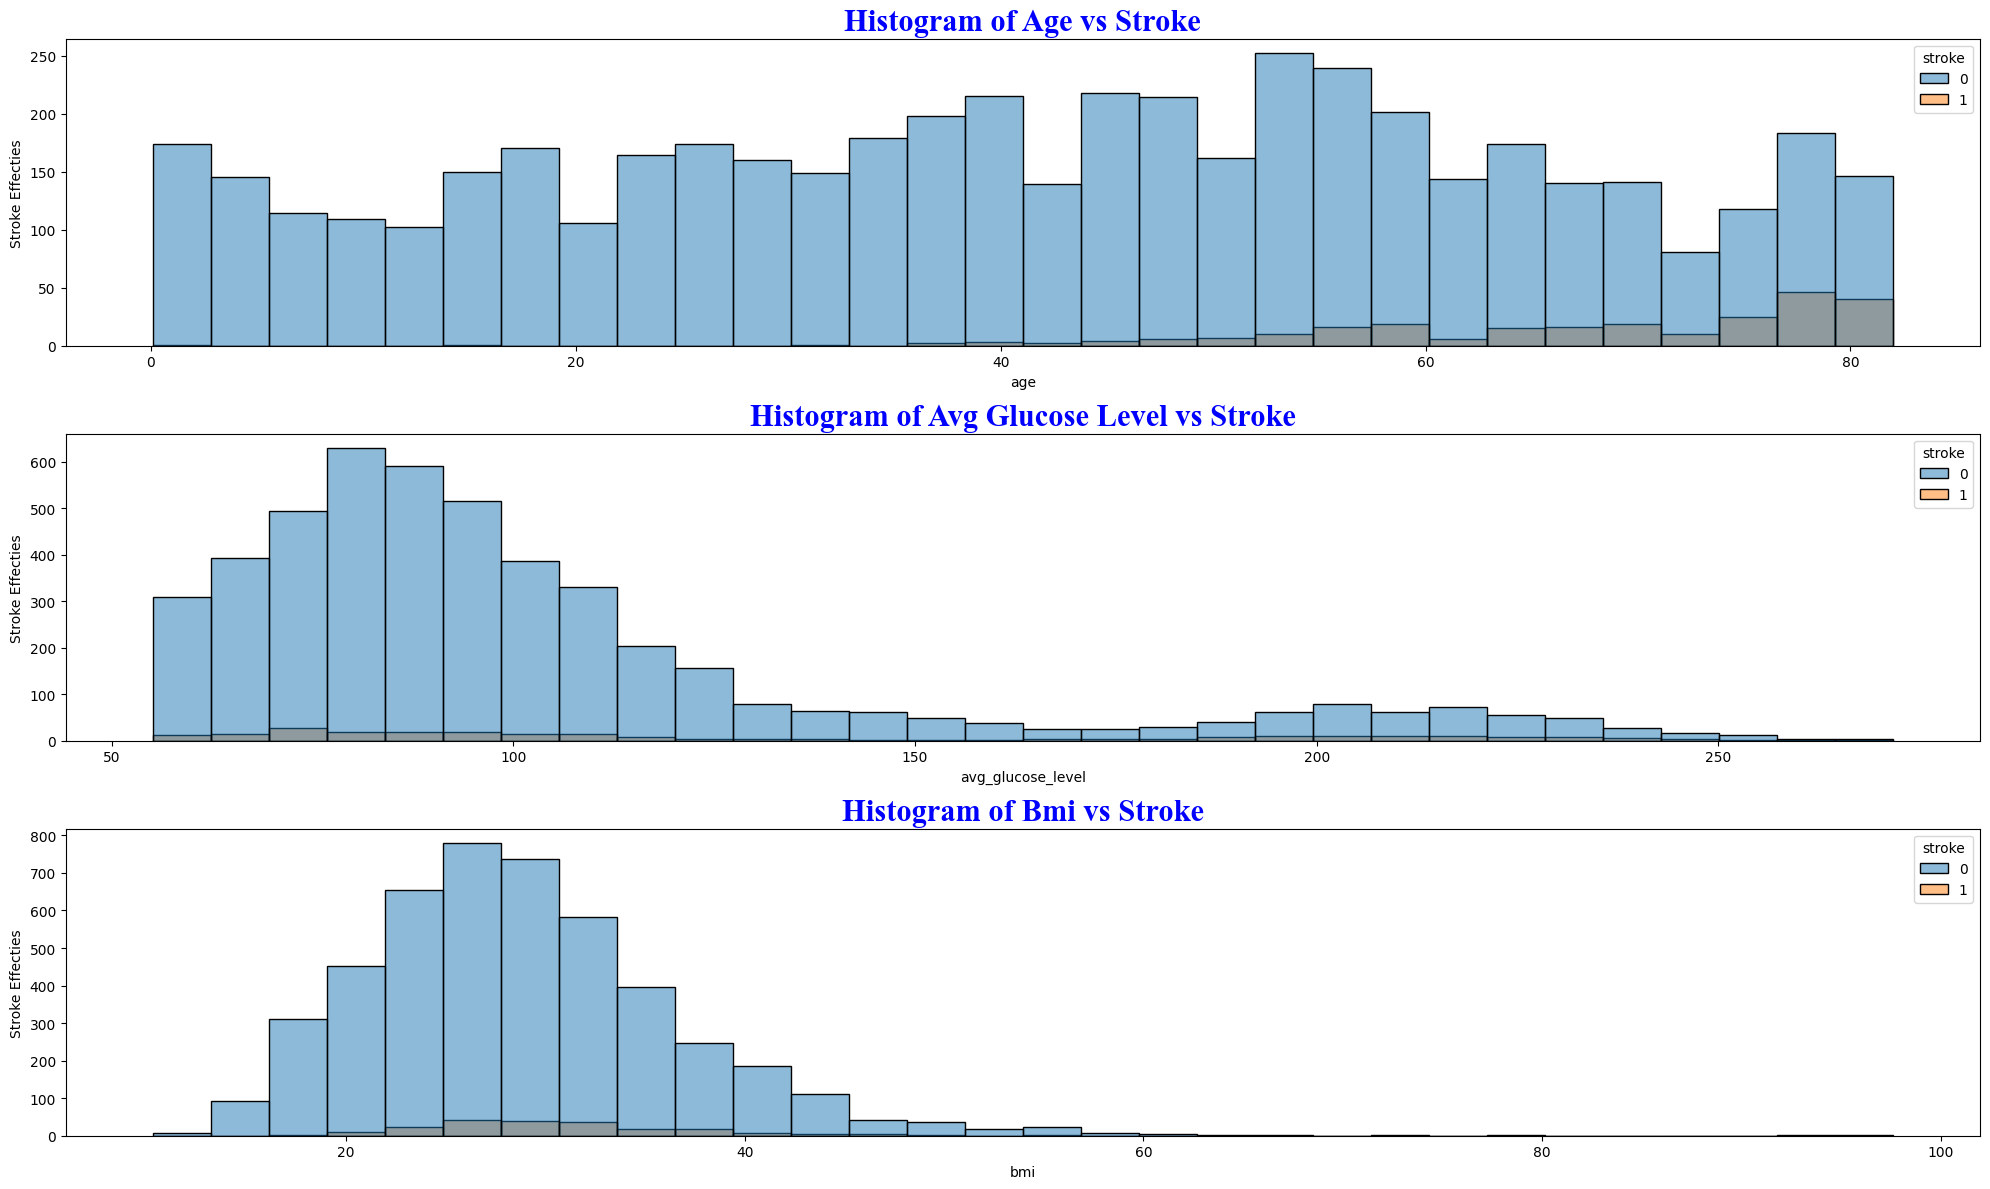

In [149]:
# Numerical columns to visualize
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Set up subplots
fig, Axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(20, 12))

# Plot histograms for each numerical column
for a, b in zip(numerical_columns, Axes):
    sns.histplot(x=a, hue='stroke', data=data_stroke, ax=b, bins=30)
    b.set_title(f'Histogram of {a.replace("_"," ").title()} vs Stroke',fontdict={
        'family': 'Times New Roman',  # Font family
        'size': 22,                  # Font size
        'weight': 'bold',            # Font weight (e.g., 'normal', 'bold')
        'color': 'blue'              # Font color
    })
    b.set_xlabel(a)
    b.set_ylabel('Stroke Effecties')

plt.tight_layout()
plt.show()


In [150]:
data_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


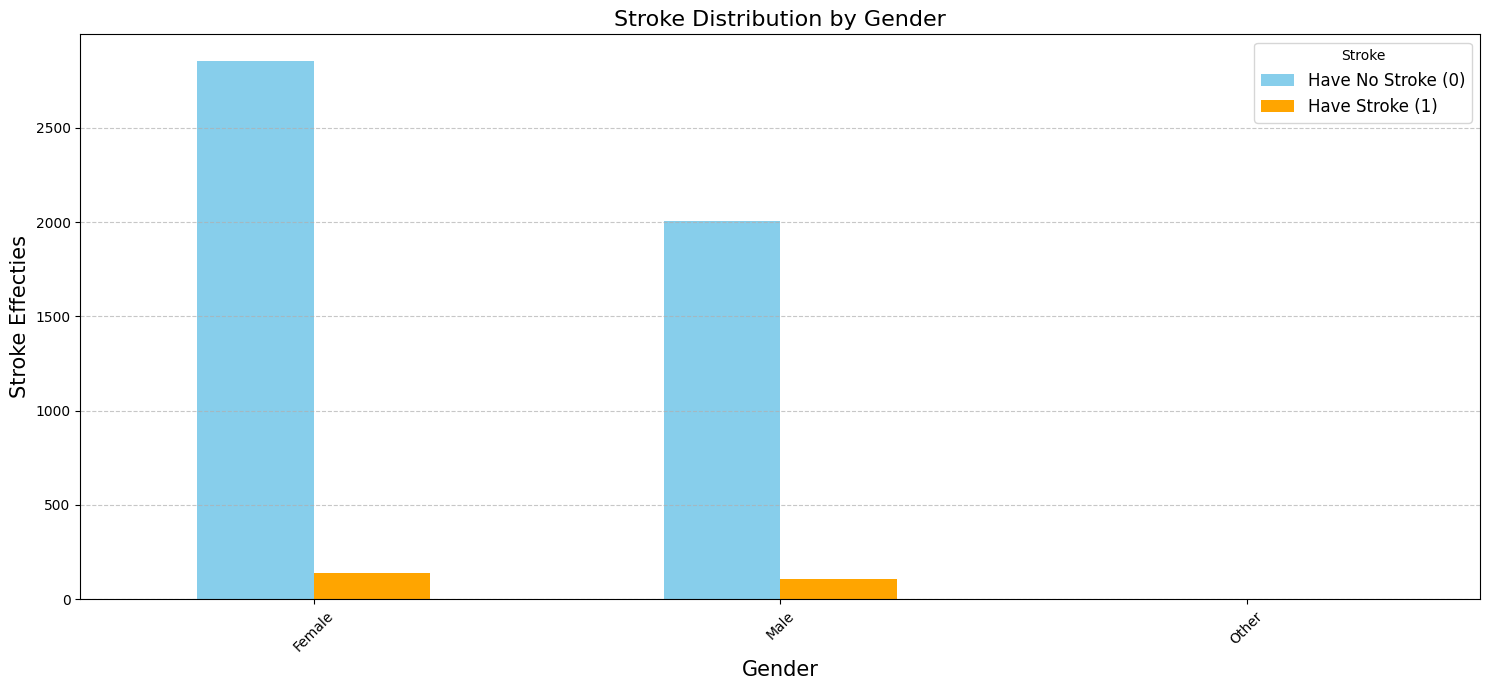

In [151]:

# Grouping data to count occurrences of stroke for each gender
gender_stroke_count = data_stroke.groupby(['gender', 'stroke']).size().unstack()

# Plotting
gender_stroke_count.plot(kind='bar', stacked=False, figsize=(15,7), color=['skyblue', 'orange'])

# Customizing the plot
plt.title('Stroke Distribution by Gender', fontsize=16)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Stroke Effecties',fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Stroke', labels=['Have No Stroke (0)', 'Have Stroke (1)'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

<Axes: xlabel='stroke', ylabel='count'>

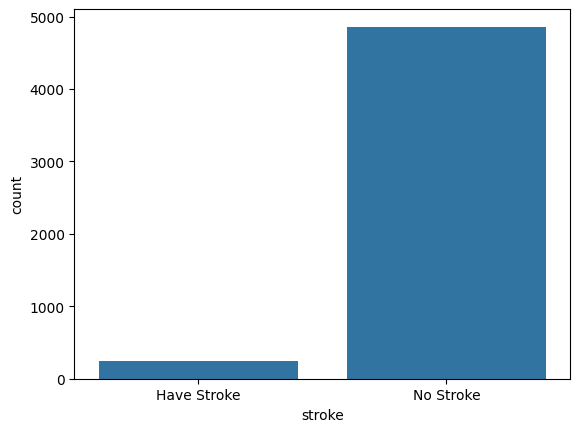

In [152]:

sns.countplot(x=data_stroke["stroke"].map({0:"No Stroke",1:"Have Stroke"}))


In [153]:
# Removing the rwos that contains missing values using the dropna function of Pandas

data_stroke.dropna(inplace=True)

In [154]:
print(set(data_stroke["gender"].unique()))
print(set(data_stroke["ever_married"].unique()))
print(set(data_stroke["Residence_type"].unique()))
print(set(data_stroke["smoking_status"].unique()))
print(set(data_stroke["work_type"].unique()))

{'Female', 'Male', 'Other'}
{'Yes', 'No'}
{'Urban', 'Rural'}
{'never smoked', 'Unknown', 'formerly smoked', 'smokes'}
{'Self-employed', 'Private', 'Govt_job', 'children', 'Never_worked'}


In [155]:
data_stroke["gender"] = data_stroke["gender"].map({'Female':2, 'Male':1, 'Other':0})
data_stroke["ever_married"] = data_stroke["ever_married"].map({'Yes':1 , 'No':0})
data_stroke["Residence_type"] = data_stroke["Residence_type"].map({'Urban':1, 'Rural':0})
data_stroke["smoking_status"] = data_stroke["smoking_status"].map({'never smoked':3, 'Unknown':0, 'formerly smoked':2, 'smokes':1})
data_stroke["work_type"] = data_stroke["work_type"].map({'Self-employed':0, 'Private':1, 'Govt_job':2, 'children':3, 'Never_worked':4})

In [156]:
data_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


<Axes: >

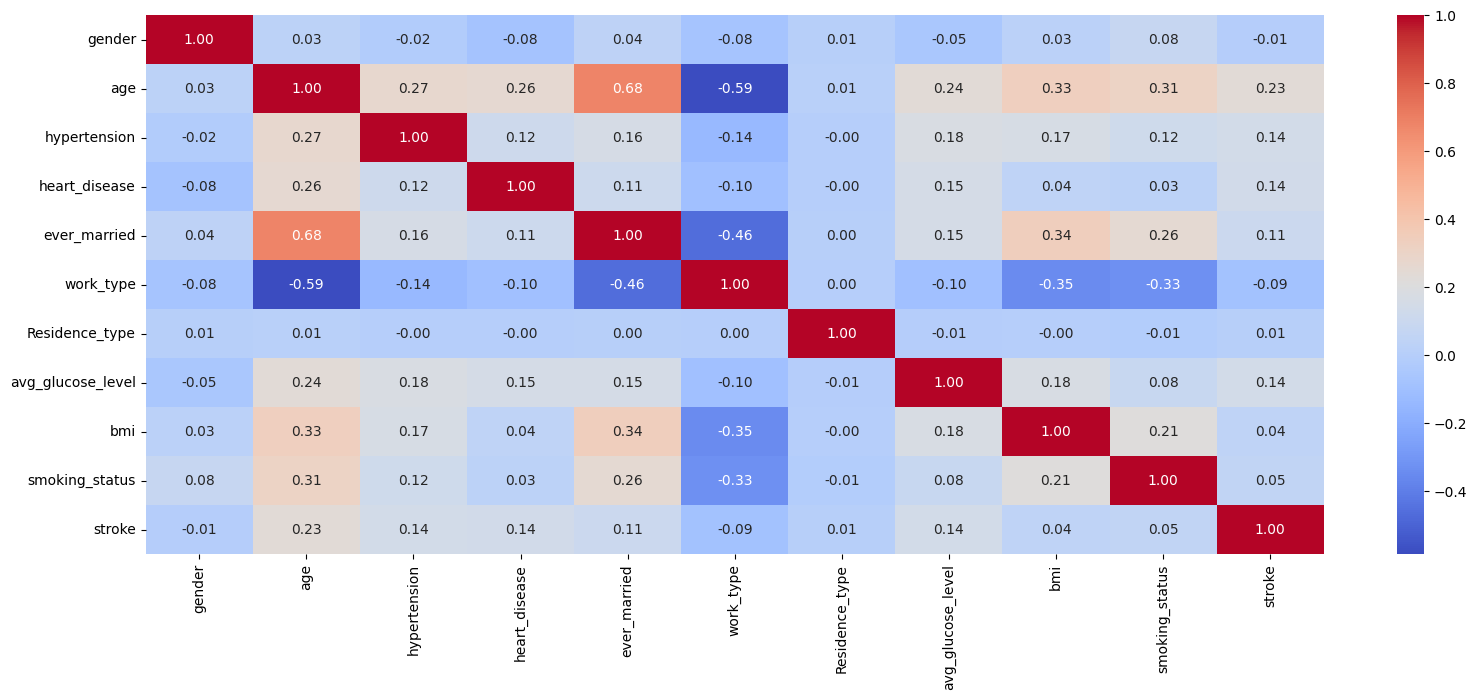

In [157]:
# Correlation MAtrix for the data understanding the realtion of features with target variable

corr_matr = data_stroke.corr()
plt.figure(figsize=(19,7))
sns.heatmap(corr_matr,annot=True,cmap="coolwarm",fmt=".2f")



In [158]:
# Checking for correlation 

corr_matr["stroke"]
cor_target = corr_matr["stroke"]
relevant_features = cor_target[(cor_target > 0) | (cor_target < 0)]

relevant_features = list(relevant_features.keys())[:-1]

relevant_features

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [159]:
print(f"Total No of Original Columns: {len(data_stroke.columns)}")
print(f"Total No of Selected Columns: {len(relevant_features)}")

Total No of Original Columns: 11
Total No of Selected Columns: 10


In [160]:
# Assuming data_stroke is your DataFrame
X = data_stroke[relevant_features]
y = data_stroke['stroke']

# Specify train_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7, random_state=42)

# **Logistic Regression Model**


In [161]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

f:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [162]:
# Make predictions on the test data
predictions_by_logistic_regression_model = logistic_regression.predict(X_test)

### **Model 1 Evalauation using Classification Report, Confusion Matrix and Accuracy Score Metrics**

In [163]:
print("Classification Report for Model 1: Logisitic Regression\n")
print(classification_report(y_test, predictions_by_logistic_regression_model))


Classification Report for Model 1: Logisitic Regression

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473



f:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


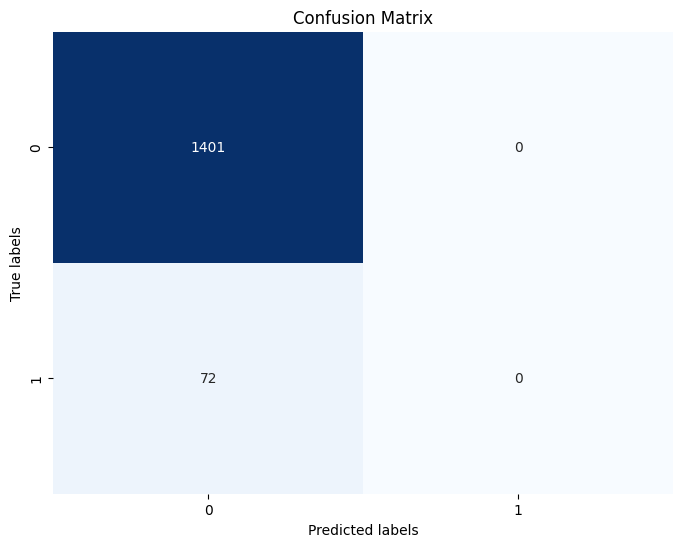

In [164]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions_by_logistic_regression_model)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [165]:
log_model_acc = (accuracy_score(y_test, predictions_by_logistic_regression_model)*100)

print("Accuracy Score of Logitic Regression Model: ",log_model_acc,"%")


Accuracy Score of Logitic Regression Model:  95.11201629327903 %


### **Now Creating another ML Model i.e Decision Tree Classification Mode**

In [166]:
deci_model = DecisionTreeClassifier()

deci_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [167]:
decision_predictions = deci_model.predict(X_test)

### **Model 2 Evalauation using Accuracy Score and Classification Report Metrics**

In [168]:

print("Classification Report for Model 2: Decision Tree\n")
print(classification_report(y_test, decision_predictions))

Classification Report for Model 2: Decision Tree

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1401
           1       0.11      0.11      0.11        72

    accuracy                           0.91      1473
   macro avg       0.53      0.53      0.53      1473
weighted avg       0.91      0.91      0.91      1473



In [169]:
dec_mod_acc = (accuracy_score(y_test, decision_predictions)*100)

print("Accuracy Score of Decision Tree Classification Model: ",dec_mod_acc,"%")


Accuracy Score of Decision Tree Classification Model:  91.0386965376782 %
